In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv("C:\\Users\\Admin\\Desktop\\csv\\Netflix Userbase.csv")
print(df)


      User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

             Country  Age  Gender      

Clean data

In [11]:
# Inspect the data
print(df.head())  
print(df.info())

# Handle missing values and Remove duplicates
df = df.dropna()
df = df.drop_duplicates()

# Con vert data type
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# print(df)

# Export file
#df.to_csv('cleaned_data.csv', index=False)


   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             -----

The total number of users and total revenue from each country

          Country  User ID  Monthly Revenue
0       Australia      183             2271
1          Brazil      183             2285
2          Canada      317             3950
3          France      183             2307
4         Germany      183             2260
5           Italy      183             2317
6          Mexico      183             2237
7           Spain      451             5662
8  United Kingdom      183             2318
9   United States      451             5664


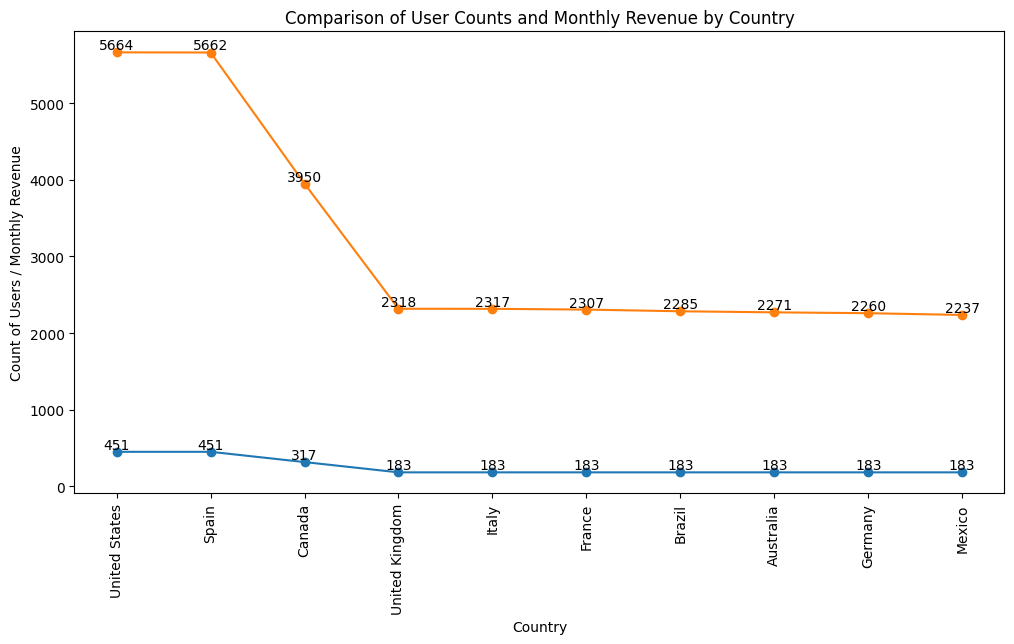

In [12]:
country_data = df.groupby('Country').agg({'User ID': 'count', 'Monthly Revenue': 'sum'}).reset_index()
print(country_data)
country_data = country_data.sort_values(by='Monthly Revenue', ascending=False)
countries = country_data['Country']
user_counts = country_data['User ID']
monthly_revenue = country_data['Monthly Revenue']

plt.figure(figsize=(12, 6))
plt.plot(countries, user_counts, marker='o', label='Number of Users')
plt.plot(countries, monthly_revenue, marker='o', label='Monthly Revenue')

for i, country in enumerate(countries):
    plt.text(country, user_counts.iloc[i], str(user_counts.iloc[i]), ha='center', va='bottom')
    plt.text(country, monthly_revenue.iloc[i], str(monthly_revenue.iloc[i]), ha='center', va='bottom')
    
plt.xlabel('Country')
plt.ylabel('Count of Users / Monthly Revenue')
plt.title('Comparison of User Counts and Monthly Revenue by Country')
plt.xticks(rotation=90)
plt.show()

Percentage of users by age and gender 

    Age  Gender  Count
0    26  Female      1
1    27  Female     38
2    27    Male     49
3    28  Female     57
4    28    Male     58
5    29  Female     47
6    29    Male     57
7    30  Female     57
8    30    Male     59
9    31  Female     56
10   31    Male     59
11   32  Female     50
12   32    Male     42
13   33  Female     42
14   33    Male     51
15   34  Female     51
16   34    Male     37
17   35  Female     49
18   35    Male     56
19   36  Female     48
20   36    Male     51
21   37  Female     51
22   37    Male     56
23   38  Female     33
24   38    Male     56
25   39  Female     57
26   39    Male     59
27   40  Female     54
28   40    Male     49
29   41  Female     56
30   41    Male     58
31   42  Female     59
32   42    Male     43
33   43  Female     44
34   43    Male     50
35   44  Female     51
36   44    Male     35
37   45  Female     46
38   45    Male     43
39   46  Female     53
40   46    Male     46
41   47  Female     59
42   47    

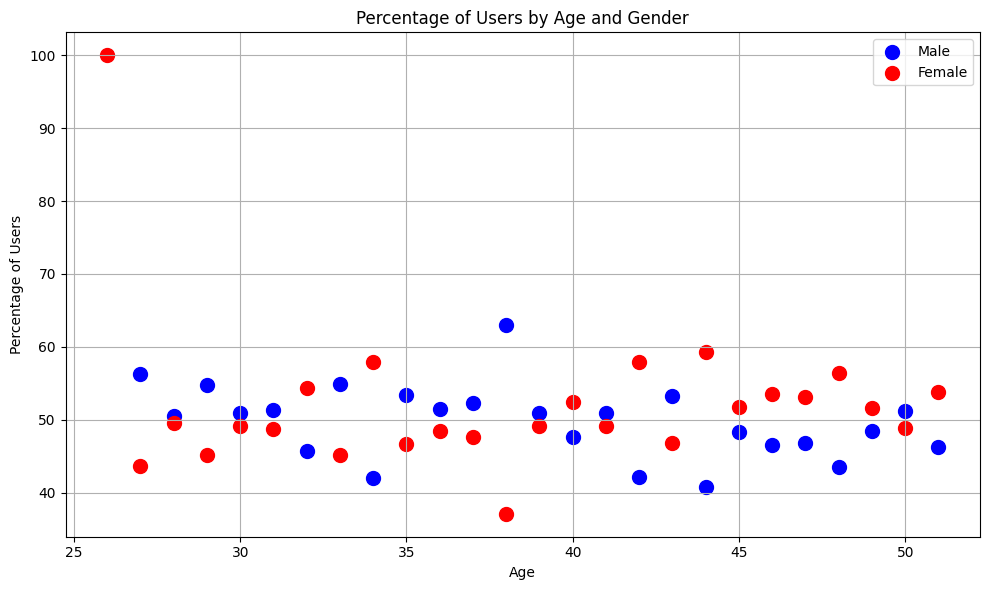

In [13]:
users_by_age_sex = df.groupby(['Age', 'Gender'])['User ID'].count().reset_index()
users_by_age_sex.columns = ['Age', 'Gender', 'Count']
print(users_by_age_sex)
total_users_by_age = users_by_age_sex.groupby('Age')['Count'].sum().reset_index()
total_users_by_age.columns = ['Age', 'Total Count']
# print(total_users_by_age)
users_by_age_sex = pd.merge(users_by_age_sex, total_users_by_age, on='Age')
users_by_age_sex['Percentage'] = (users_by_age_sex['Count'] / users_by_age_sex['Total Count']) * 100

plt.figure(figsize=(10, 6))
plt.scatter(users_by_age_sex[users_by_age_sex['Gender'] == 'Male']['Age'],
            users_by_age_sex[users_by_age_sex['Gender'] == 'Male']['Percentage'],
            label='Male', color='blue', marker='o', s=100)
plt.scatter(users_by_age_sex[users_by_age_sex['Gender'] == 'Female']['Age'],
            users_by_age_sex[users_by_age_sex['Gender'] == 'Female']['Percentage'],
            label='Female', color='red', marker='o', s=100)
plt.xlabel('Age')
plt.ylabel('Percentage of Users')
plt.title('Percentage of Users by Age and Gender')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Device used to access Netflix

        index  Device
0      Laptop     636
1      Tablet     633
2  Smartphone     621
3    Smart TV     610


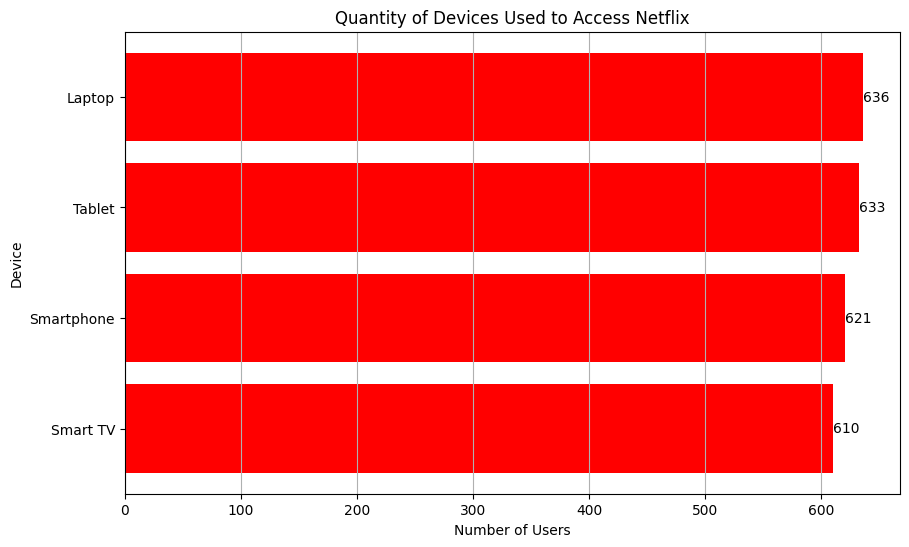

In [14]:
device_counts = df['Device'].value_counts().reset_index()
print(device_counts)
device_counts.columns = ['Device', 'Count']
device_counts = device_counts.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(device_counts['Device'], device_counts['Count'], color='red')
for i, v in enumerate(device_counts['Count']):
    plt.text(v, i, str(v), ha='left', va='center')
plt.xlabel('Number of Users')
plt.ylabel('Device')
plt.title('Quantity of Devices Used to Access Netflix')
plt.grid(axis='x')
plt.show()

Usage rate of Netflix services

Subscription Type
Basic       39.96
Premium     29.32
Standard    30.72
Name: User ID, dtype: float64


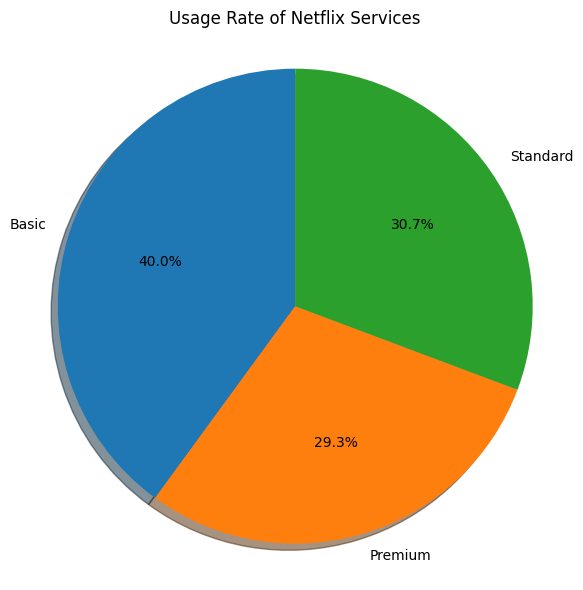

In [15]:
service_counts = df.groupby('Subscription Type')['User ID'].count()
total_users = len(df)
usage_rate = (service_counts / total_users) * 100
print(usage_rate)

# Create fig
plt.figure(figsize=(6, 6))
plt.pie(usage_rate, labels=usage_rate.index, autopct='%.1f%%', shadow=True, startangle=90)

# Customize the plot
plt.axis('equal')  
plt.title('Usage Rate of Netflix Services')
plt.tight_layout()
plt.show()

Revenue received from user

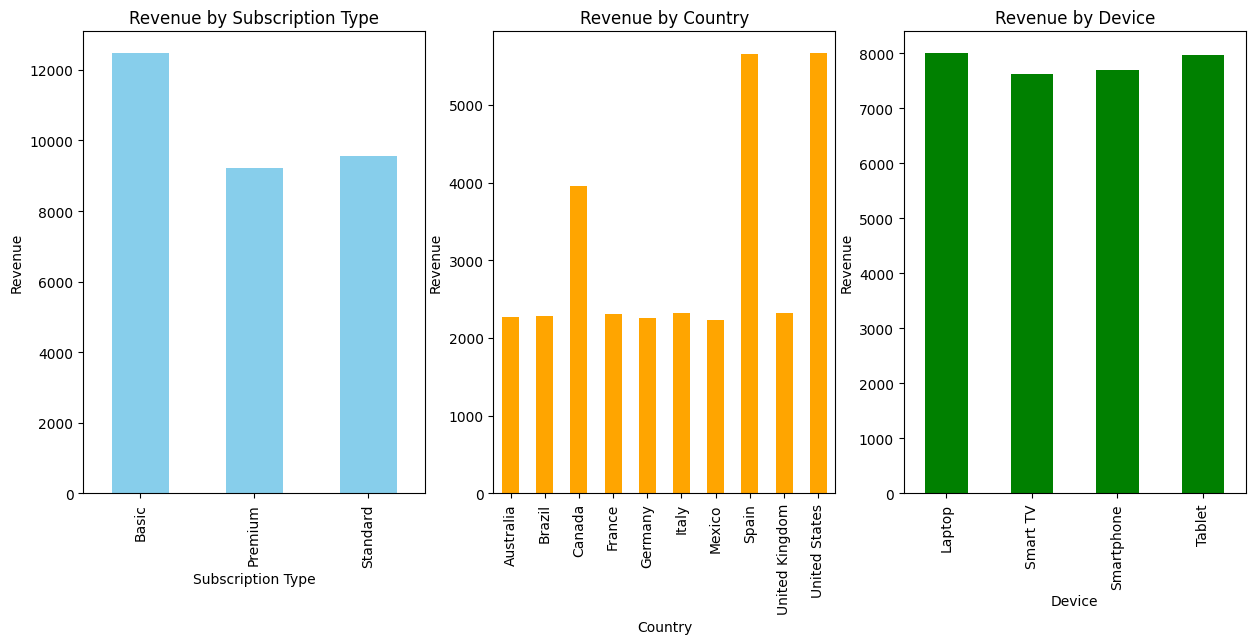

Total Revenue Received: $ 31271


In [16]:
revenue_by_subscription_type = df.groupby('Subscription Type')['Monthly Revenue'].sum()
revenue_by_country = df.groupby('Country')['Monthly Revenue'].sum()
revenue_by_device = df.groupby('Device')['Monthly Revenue'].sum()

# Create fig
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Customize the plot
revenue_by_subscription_type.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_xlabel('Subscription Type')
ax1.set_ylabel('Revenue')
ax1.set_title('Revenue by Subscription Type')

revenue_by_country.plot(kind='bar', color='orange', ax=ax2)
ax2.set_xlabel('Country')
ax2.set_ylabel('Revenue')
ax2.set_title('Revenue by Country')

revenue_by_device.plot(kind='bar', color='green', ax=ax3)
ax3.set_xlabel('Device')
ax3.set_ylabel('Revenue')
ax3.set_title('Revenue by Device')

plt.show()


total_revenue_received = df['Monthly Revenue'].sum()
print('Total Revenue Received: $', total_revenue_received)

Revenue Received in 2022 and 2023: $ 31095


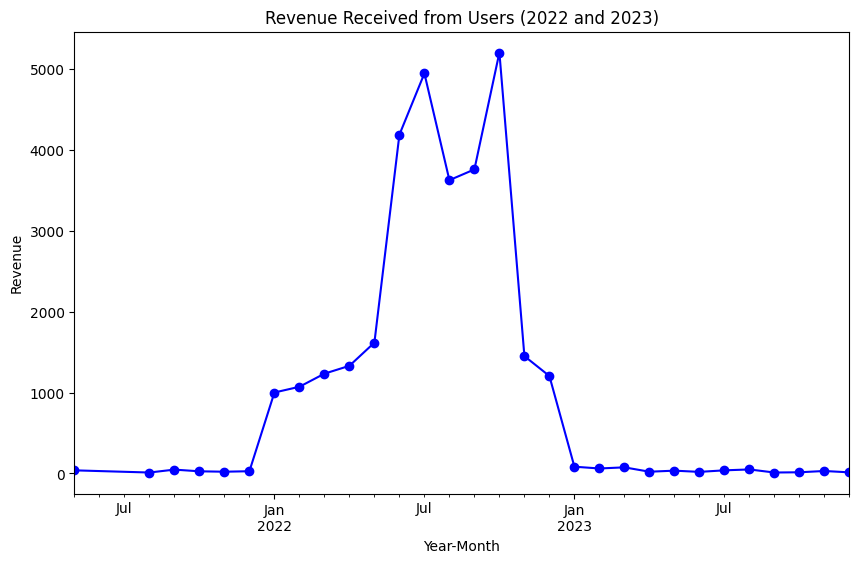

In [17]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df_2022_2023 = df[df['Join Date'].dt.year.isin([2022, 2023])]
revenue_2022_2023 = df_2022_2023['Monthly Revenue'].sum()
print('Revenue Received in 2022 and 2023: $', revenue_2022_2023)

revenue_by_date = df.groupby(df['Join Date'].dt.to_period('M'))['Monthly Revenue'].sum()

# Create Fig
plt.figure(figsize=(10, 6))
revenue_by_date.plot(kind='line', marker='o', linestyle='-', color='b')

# Customize the plot
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Revenue Received from Users (2022 and 2023)')

plt.show()


Revenue prediction in 2023-2024

Importing plotly failed. Interactive plots will not work.
16:36:39 - cmdstanpy - INFO - Chain [1] start processing
16:36:40 - cmdstanpy - INFO - Chain [1] done processing


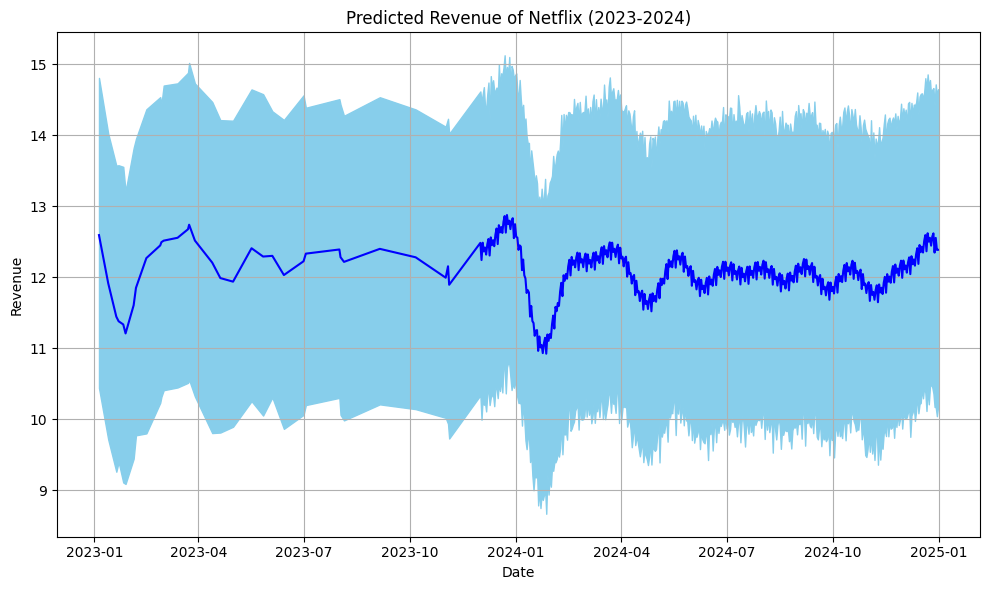

In [18]:
from prophet import Prophet

revenue_data = df[['Join Date', 'Monthly Revenue']].rename(columns={'Join Date': 'ds', 'Monthly Revenue': 'y'})
model = Prophet()
model.fit(revenue_data)

# Create a dataframe with future dates for prediction (2023-2024)
future = model.make_future_dataframe(periods=730)  # (730 is 2 year)

# Make predictions for future dates
forecast = model.predict(future)
predictions_2023_2024 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2024-12-31')]


plt.figure(figsize=(10, 6))
plt.fill_between(predictions_2023_2024['ds'], predictions_2023_2024['yhat_lower'], predictions_2023_2024['yhat_upper'], color='skyblue')
plt.plot(predictions_2023_2024['ds'], predictions_2023_2024['yhat'], color='b')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Predicted Revenue of Netflix (2023-2024)')
plt.grid(True)
plt.tight_layout()
plt.show()


Connect To SQL

In [9]:
import pyodbc
# connect database from sql
conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=LAPTOP-UVRSHL4N;' # Server login at SQL Server
                        'Database=Netflix;'
                        'Trusted_Connection=yes;')
# print out first 5 line
cursor = conn.cursor()
query = 'select top 5* from [Netflix_Userbase] ;'
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

print()

# print out all device, country, subscription type
print('Device used: ')
query_device_used = 'select DISTINCT  Device from Netflix_Userbase'
cursor.execute(query_device_used)
results = cursor.fetchall()
for row in results:
    print(row, end='  ')
print()

print('Country that used Netflix: ')
query_country = 'select DISTINCT  Country from Netflix_Userbase'
cursor.execute(query_country)
results = cursor.fetchall()
for row in results:
    print(row, end='  ')
print()

print('Subscription type: ')
query_SubType = 'select DISTINCT  [Subscription Type] from Netflix_Userbase'
cursor.execute(query_SubType)
results = cursor.fetchall()
for row in results:
    print(row, end='  ')
print()

query_revenue2022 = 'SELECT SUM([Monthly Revenue]) AS Revenue2022 ' \
                    'FROM Netflix_Userbase ' \
                    'WHERE YEAR([Join Date]) in (22,23)'
cursor.execute(query_revenue2022)
results = cursor.fetchall()

print('Total revenue 2022-2023:')
for row in results:
    print(row, end='  ')

(1, 'Basic', 10.0, '0015-01-22', '0010-06-23', 'United States', 28, 'Male', 'Smartphone', '1 Month')
(2, 'Premium', 15.0, '0005-09-21', '0022-06-23', 'Canada', 35, 'Female', 'Tablet', '1 Month')
(3, 'Standard', 12.0, '0028-02-23', '0027-06-23', 'United Kingdom', 42, 'Male', 'Smart TV', '1 Month')
(4, 'Standard', 12.0, '0010-07-22', '0026-06-23', 'Australia', 51, 'Female', 'Laptop', '1 Month')
(5, 'Basic', 10.0, '0001-05-23', '0028-06-23', 'Germany', 33, 'Male', 'Smartphone', '1 Month')

Device used: 
('Smart TV',)  ('Laptop',)  ('Smartphone',)  ('Tablet',)  
Country that used Netflix: 
('United States',)  ('United Kingdom',)  ('Mexico',)  ('Brazil',)  ('Italy',)  ('Canada',)  ('Spain',)  ('Australia',)  ('France',)  ('Germany',)  
Subscription type: 
('Premium',)  ('Standard',)  ('Basic',)  
Total revenue 2022-2023
(1863.0,)  